In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [4]:
train = pd.read_csv('train.csv', header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('test.csv' , header = 0, dtype={'Age': np.float64})
full_data = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

We have 891 samples in our train data which is almost 70% of the total

In [6]:
test.shape

(418, 11)

## Data Analysis

### Check for data imbalance

In [7]:
def countplot(x1,df,title):
    sns.set_style("dark")
    sns.countplot(x=x1, data=df, palette=sns.color_palette("Paired", 7), saturation=10)
    plt.title(title,fontsize = 20)
    plt.show() 

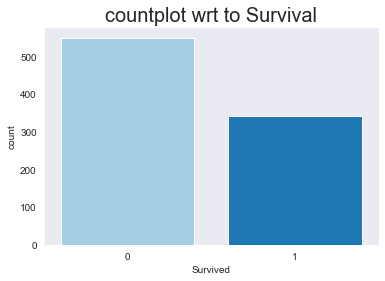

In [8]:
# Checking for data imbalance
countplot('Survived',train,'countplot wrt to Survival')

Count plot  - The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable
 
Observation: When there is a considerable, or in some circumstances extreme, discrepancy between the number of samples of each class of problem, a dataset is said to be imbalanced. As it is not the same case here, our data is balanced data

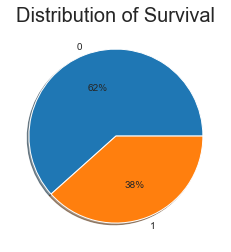

In [9]:
def pie(df):
    plt.pie(df['Survived'].value_counts(), labels=df['Survived'].value_counts().index.tolist(), autopct='%1.0f%%',shadow = True)
    plt.title('Distribution of Survival', fontsize = 20)
    plt.show()
pie(train)

Pie chart -  Pie charts make sense to show a parts-to-whole relationship for categorical or nominal data

Observation: As we can see from the pie chart, most of the customers are of the age group 30-45

In [10]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Check for missing values

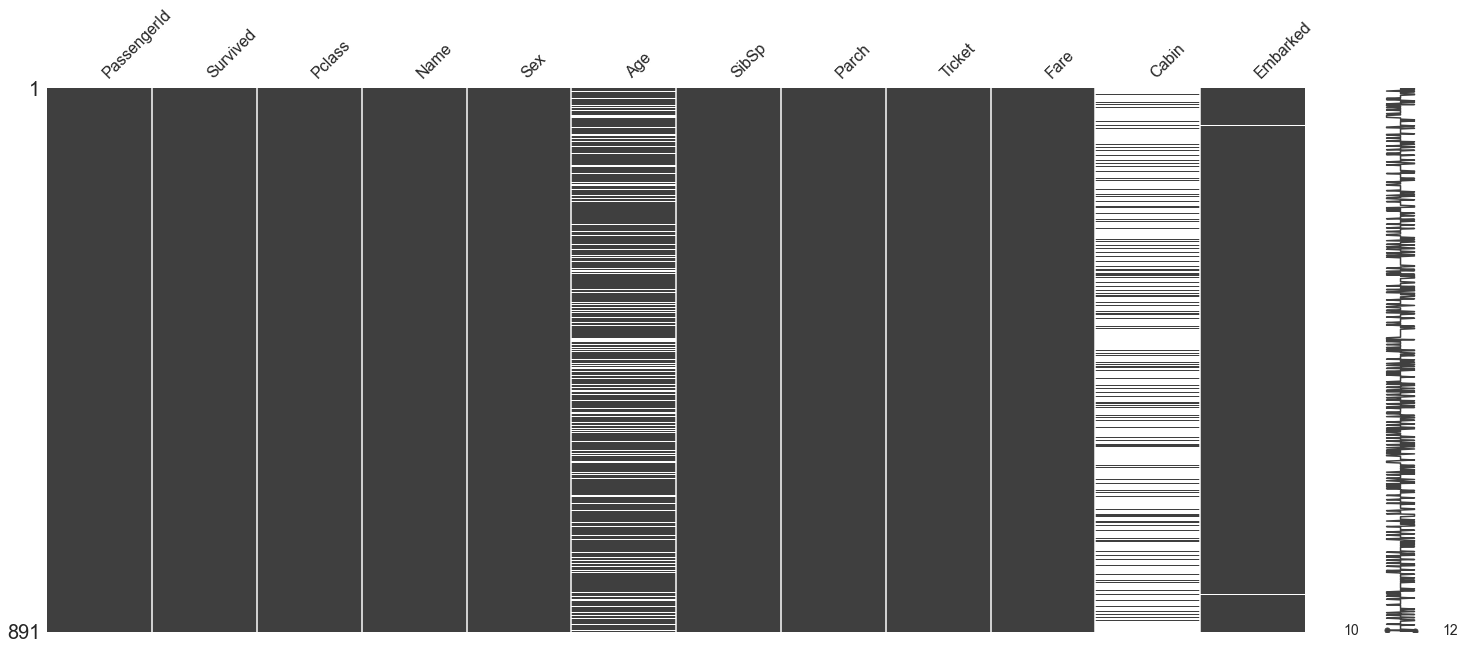

In [12]:
def missing(df):
    msno.matrix(df)
    plt.show()
missing(train)

Observation: We can see some missing values in the age,cabin and embarked columns.The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps

In [13]:
print(train.isna().mean().round(4) * 100)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


- The Age feature is missing approximately 19.8% of its values. But as age seems to be an important factor we will try to impute null values with some appropriate values during our data preprocessing
- The Cabin feature is missing approximately 77.10% of its values. Which is alot, so we might consider dropping it
- The EMbark feature is missing approximately 0.22% of its values, which is quite small and can be taken care off

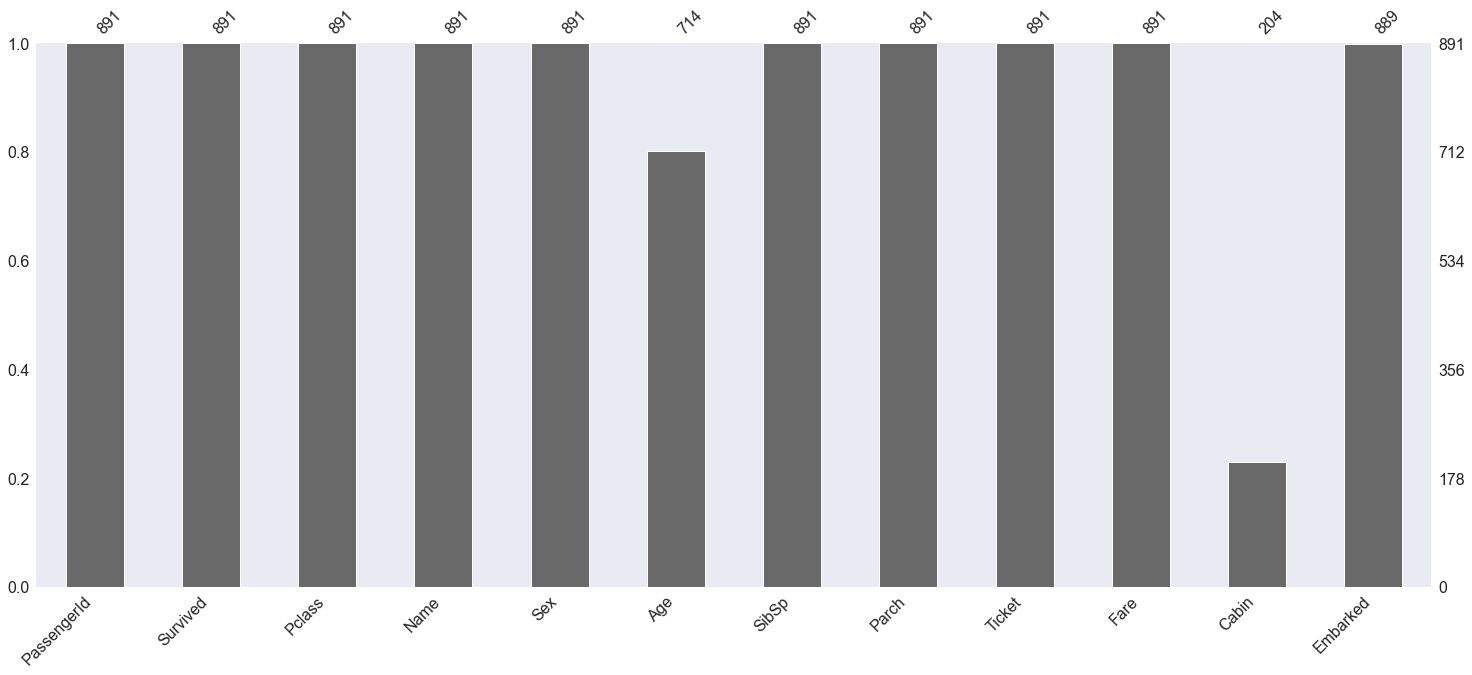

In [14]:
def miss_bar(df):
    msno.bar(df)
    plt.show()
miss_bar(train)

Missingno_bar: msno.bar is a simple visualization of nullity by column
- Age column has upto 80% of data(714 data points)
- Cabin column has upto 20% of data(204 data points)
- Embarked column has upto 99% of data(889 data points)

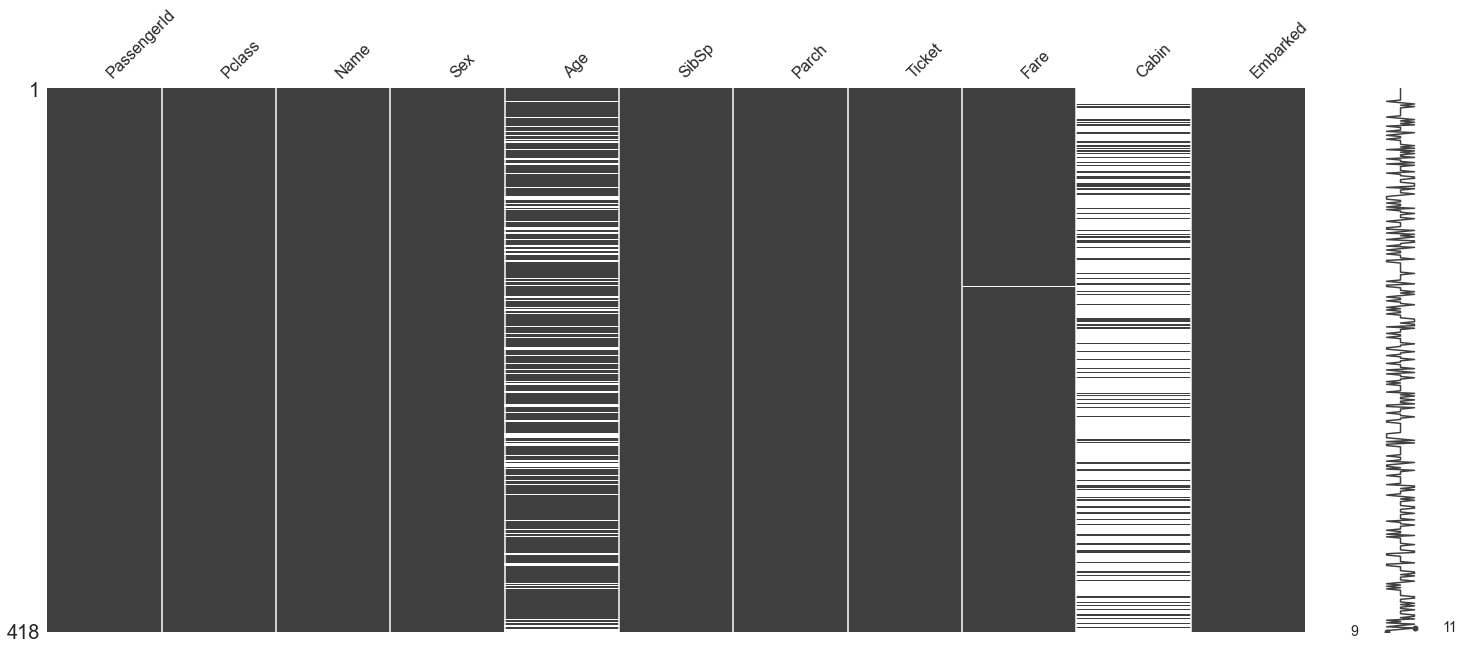

In [15]:
missing(test)

- We can see some missing values in the age and cabin columns

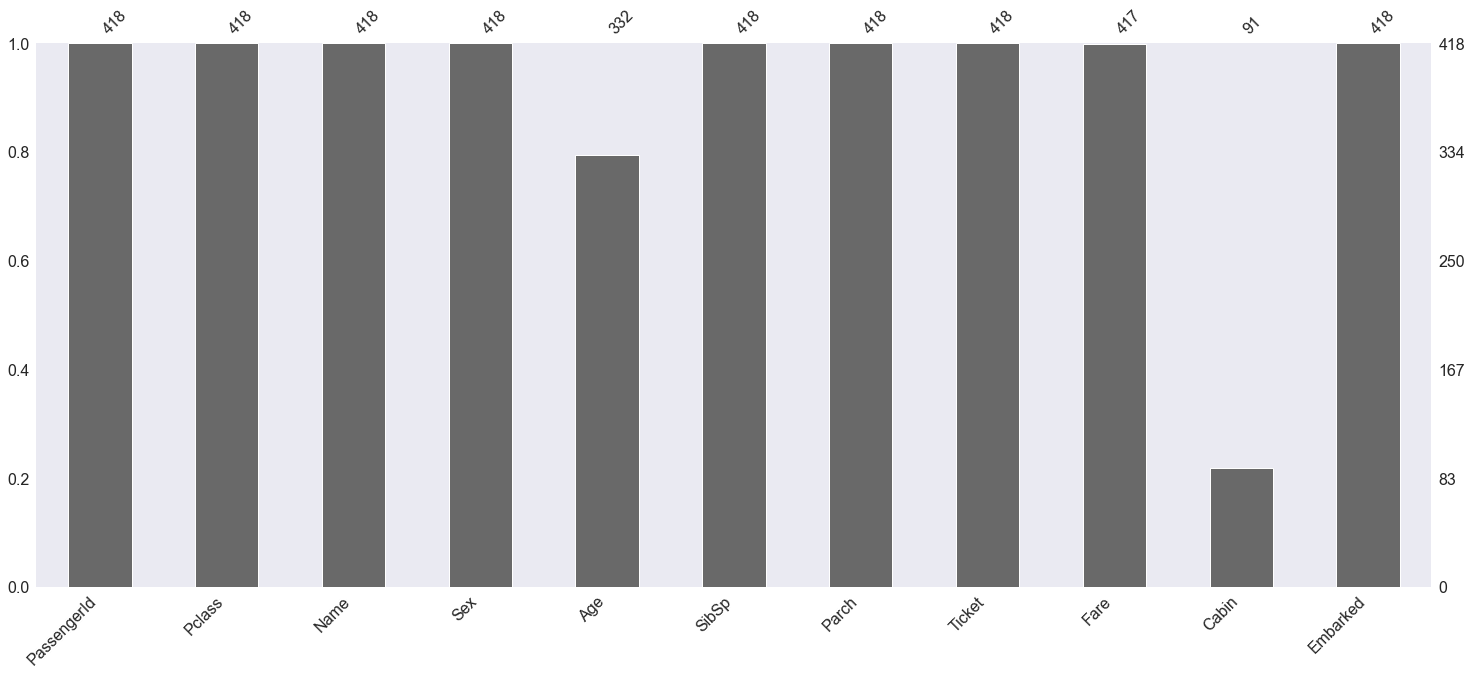

In [16]:
miss_bar(test)

- Age column has upto 80% of data(332  data points)
- Cabin column has upto 20% of data(91 data points)

## Analysing The Features

**Age column**

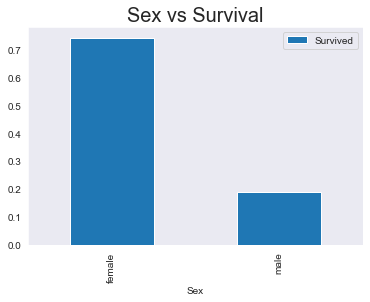

In [18]:
def barplot(df,col1,title,col2 = 'Survived'):    
    df[[col1,col2]].groupby([col1]).mean().plot.bar()
    plt.title(title,fontsize = 20)
    plt.show()
barplot(train,'Sex','Sex vs Survival')

Observation: We observe that females survival rate is more

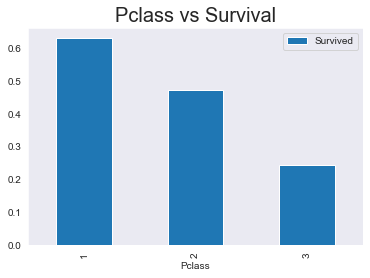

In [19]:
barplot(train,'Pclass','Pclass vs Survival')

Observation: We observe that class1 survival rate is more as compared to other classes. Whereas class3 survival is the least

In [20]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Observation1: As we can see, 136 out of 216 passengers from pclass = 1 survived, whereas 372 out of 491 passengers from pclass = 3 did not survive

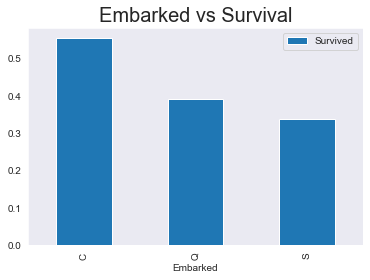

In [21]:
barplot(train,'Embarked','Embarked vs Survival')

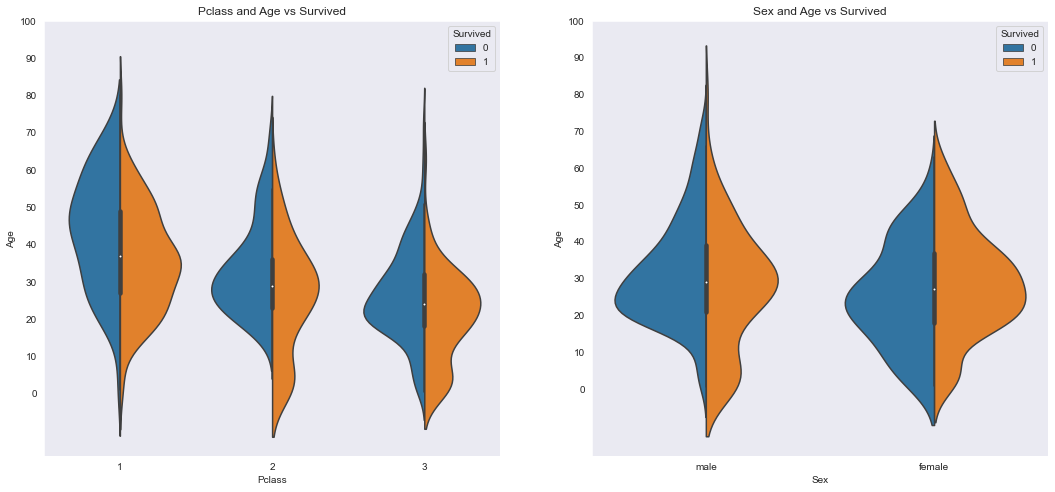

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- The number of children increased with pclass and their survival rate was pretty good irrespective of what pclass they were in
- Survival rate of men decreased with increase in age
- Survival rate of women aged between 20-50 is more. Also, irrespective of age or class the survival rate of women was good

**Chances for Survival by Port Of Embarkation**

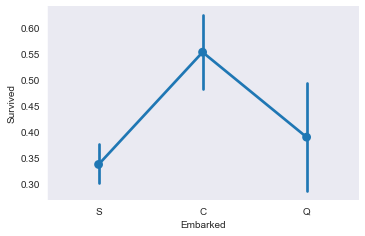

In [22]:
sns.factorplot('Embarked','Survived',data=train)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

Observation: sSurvival rate of port c is highest around 55%

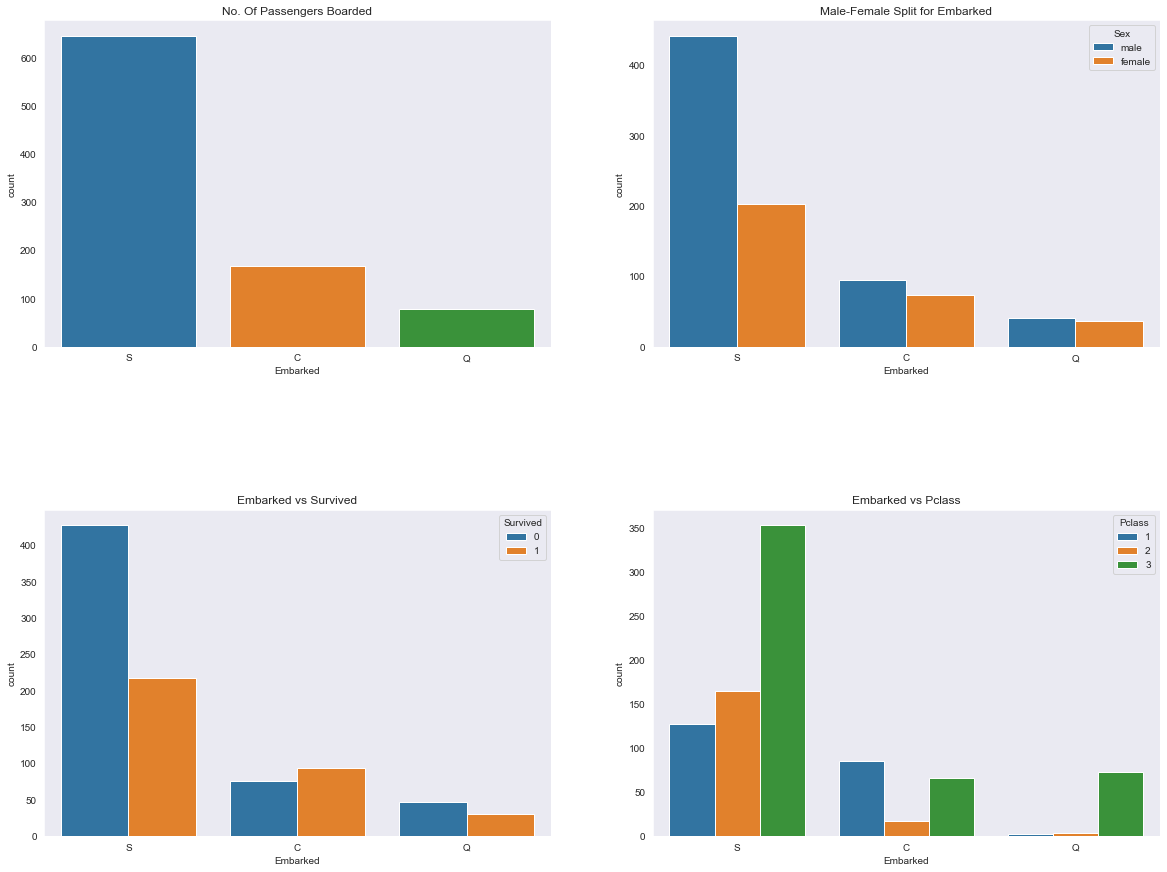

In [23]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

- More number of people have boarded from port S and least is from port Q
- More number of male passengers have baorded from port S
- The chances of survival wrt to port C is more
- More number of passengers from pclass =3 have boarded from port S and more number of passengers from pclass = 1 have boarded from port S, hence we can assume that couls be a reason why more number of passengers were saved from port S

In [25]:
pd.crosstab(train.Embarked,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


- As you can see, 93 out of 168 people have survived from port C. So sruvival rate wrt port C is more

**Chances for Survival by Port Of SibSp**

In [26]:
pd.crosstab([train.SibSp],train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


- As you can see, people with no sibling/spouse survived the most


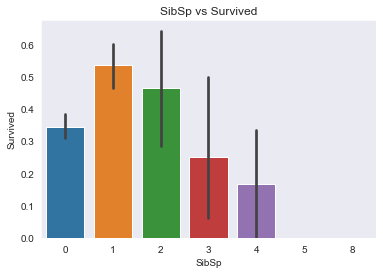

In [27]:
sns.barplot('SibSp','Survived',data=train)
plt.title('SibSp vs Survived')
plt.show()

- We observe that, with the increase in number of siblibs/spouse, survival rate decreases

In [28]:
pd.crosstab(train.SibSp,train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- We observe that,passengers with siblib/spouse>3 were all from pclass= 3, so their survival rate was less

**Chances for Survival by Port Of Parch**

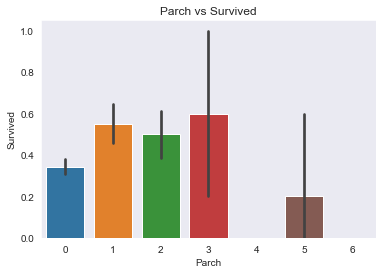

In [29]:
sns.barplot('Parch','Survived',data=train)
plt.title('Parch vs Survived')
plt.show()

- We observe that, with the increase in number of parents/children, survival rate decreases

In [30]:
pd.crosstab(train.Parch,train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


- We observe that,passengers with Parents/children>3 were all from pclass= 3, so their survival rate was less

**Checking for outliers wrt train data**

Box plots - Box plots help visualize the distribution of quantitative values in a field. They are also valuable for comparisons across different categorical variables or identifying outliers, if either of those exist in a dataset

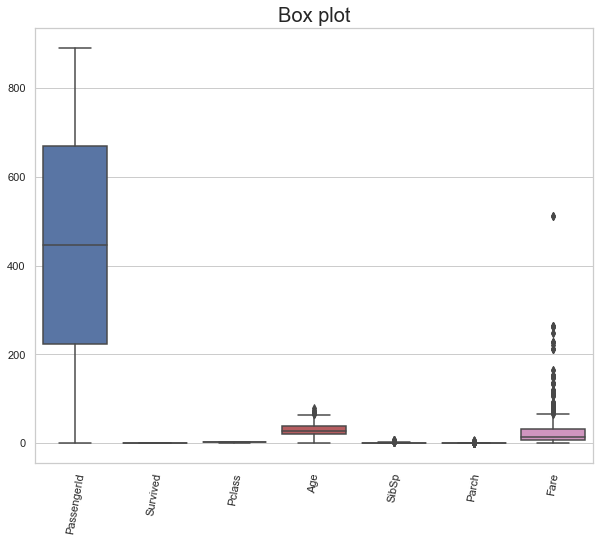

In [31]:
def outliers(df):
    sns.set(style="whitegrid",font_scale=1)
    plt.figure(figsize=(10,8))
    sns.boxplot(data=df)
    plt.xticks(rotation=80)
    plt.title("Box plot",fontsize = 20)
    plt.show()
outliers(train)

- There are few passengers with high fare (maybe VIPs).

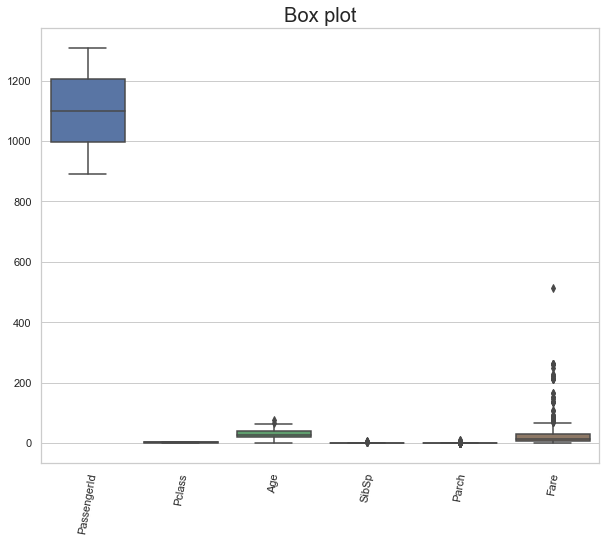

In [32]:
outliers(**Treating outliers**`test)

## Data Cleaning an Feature engineering

**Treating outliers**

In [33]:
# The code below drops the outliers by removing all the values that are below the 25th percentile and above the 75th percentile of the ‘Fare’ and 'Age' variable.
def treating_outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[col]=np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

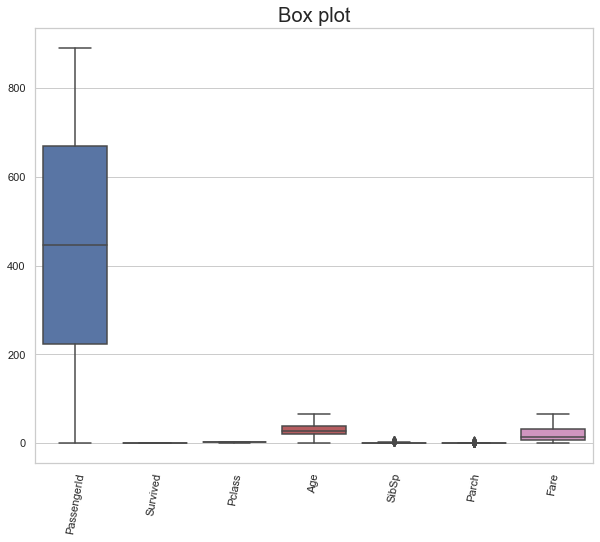

In [34]:
treating_outliers(train,'Fare')
treating_outliers(train,'Age')
outliers(train)

As we can see, the train dataset is free of outliers

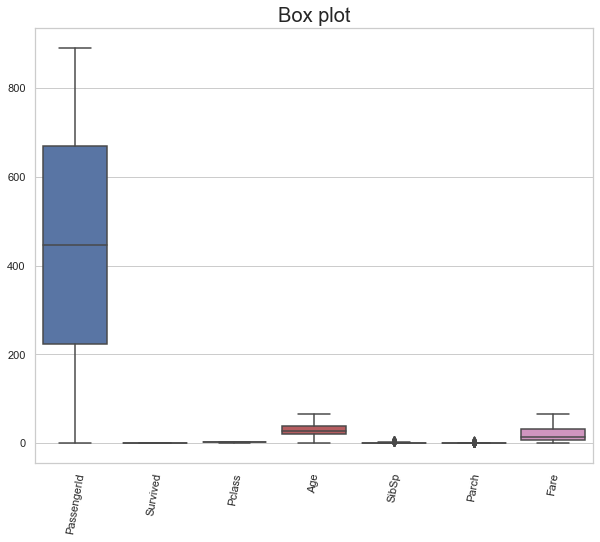

In [35]:
treating_outliers(test,'Fare')
treating_outliers(test,'Age')
outliers(train)

As we can see, the test dataset is free of outliers

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Re-reading the data for feature engineering.**

In [75]:
train = pd.read_csv('train.csv', header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('test.csv' , header = 0, dtype={'Age': np.float64})
full_data = [train, test]
PassengerId = test['PassengerId']

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Feature Engineering #

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
---------- 



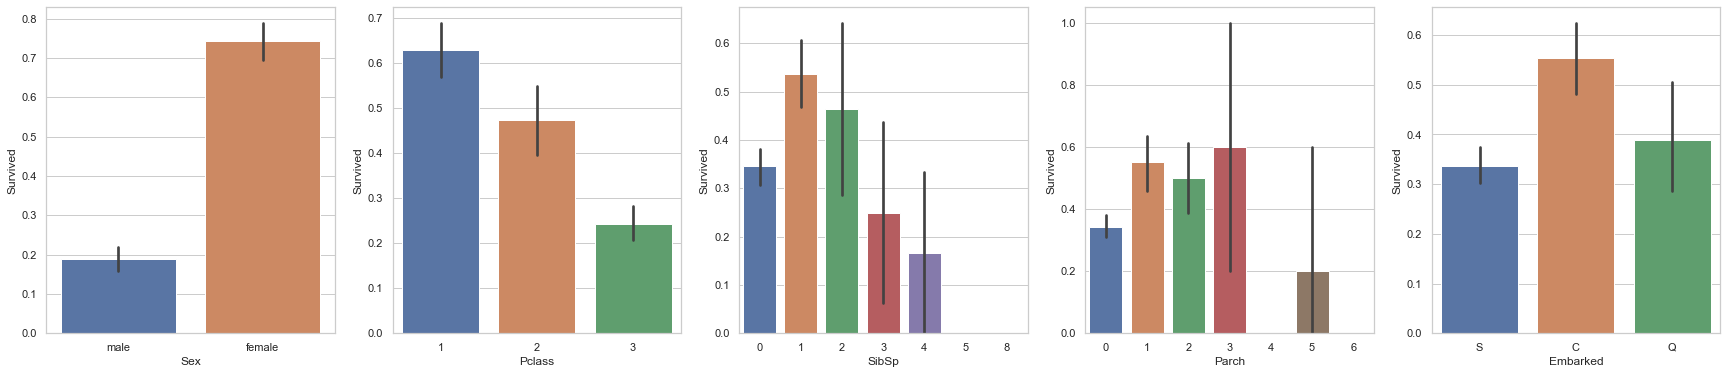

In [80]:
features = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
fig, saxis = plt.subplots(1, len(features),figsize=(len(features) * 6,6))
for ind, x in enumerate(features):
    print('Survival Correlation by:', x)
    print(train[[x, "Survived"]].groupby(x, as_index=False).mean()) 
    print('-'*10, '\n')
    sns.barplot(x, y="Survived", data=train, ax = saxis[ind])

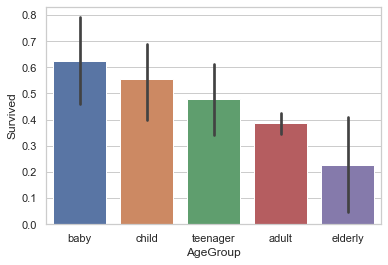

In [81]:
bins = [0, 2, 12, 17, 60, np.inf]
labels = ['baby', 'child', 'teenager', 'adult', 'elderly']
age_groups = pd.cut(train.Age, bins, labels = labels)
train['AgeGroup'] = age_groups
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

number of siblings/spouse + number of children/parents + 1 =  Family Size.

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


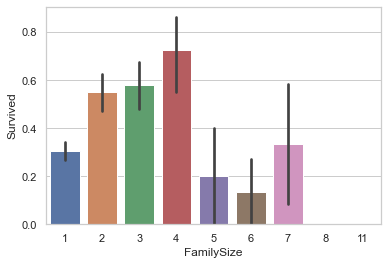

In [82]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())
sns.barplot(x="FamilySize", y="Survived", data=train)
plt.show()

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


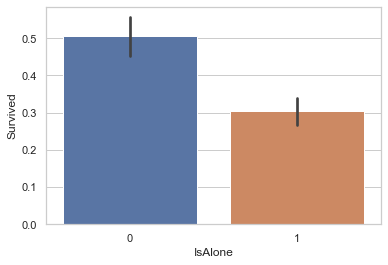

In [83]:
# check whether they are alone in this ship or not.
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())
sns.barplot(x="IsAlone", y="Survived", data=train)
plt.show()

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


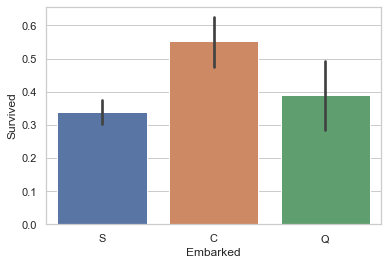

In [84]:
# The embarked feature has some missing value. and we try to fill those with the most occurred value ( 'S' ).
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())
sns.barplot(x="Embarked", y="Survived", data=train)
plt.show()

In [85]:
# Fare also has some missing value and we will replace it with the median. then we categorize it into 4 ranges.
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [86]:
# We have plenty of missing values in Age feature. Generate random numbers between (mean - std) and (mean + std) then we categorize age into 5 range.
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)

print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.528302
1   (16.0, 32.0]  0.356818
2   (32.0, 48.0]  0.369811
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [87]:
# find Title from Name
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


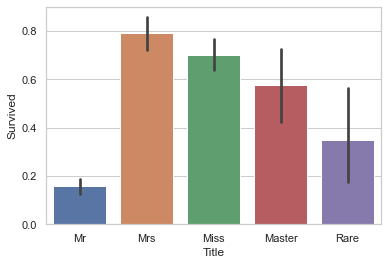

In [88]:
# categorize the titles
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())
sns.barplot(x="Title", y="Survived", data=train)
plt.show()

In [89]:
# ticket type
for dataset in full_data:
    dataset['Ticket_type'] = dataset['Ticket'].apply(lambda x: x[0:3])
    dataset['Ticket_type'] = dataset['Ticket_type'].astype('category')
    dataset['Ticket_type'] = dataset['Ticket_type'].cat.codes

In [90]:
# has cabin ?
for dataset in full_data:
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
print (train[['Has_Cabin', 'Survived']].groupby(['Has_Cabin'], as_index=False).mean())

   Has_Cabin  Survived
0          0  0.299854
1          1  0.666667


In [91]:
for dataset in full_data:
    dataset['Surname'] = dataset.Name.str.extract(r'([A-Za-z]+),', expand=False)
    dataset['TicketPrefix'] = dataset.Ticket.str.extract(r'(.*\d)', expand=False)
    dataset['Surname_Ticket'] = dataset['Surname'] + dataset['TicketPrefix']
    dataset['IsFamily'] = dataset.Surname_Ticket.duplicated(keep=False).astype(int)
    dataset['Child'] = dataset.Age.map(lambda x: 1 if x <=16 else 0)
    FamilyWithChild = dataset[(dataset.IsFamily==1)&(dataset.Child==1)]['Surname_Ticket'].unique()

    dataset['FamilyId'] = 0
    for ind, identifier in enumerate(FamilyWithChild):
        dataset.loc[dataset.Surname_Ticket==identifier, ['FamilyId']] = ind + 1

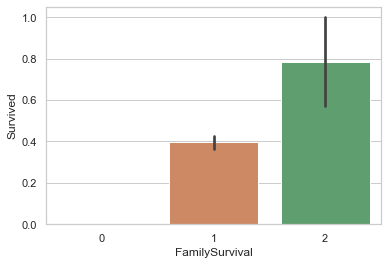

In [92]:
test['Survived'] = np.nan
for dataset in full_data:
    dataset['FamilySurvival'] = 1 
    Survived_by_FamilyId = dataset.groupby('FamilyId').Survived.sum()
    for i in range(1, len(FamilyWithChild)+1):
        if Survived_by_FamilyId[i] >= 1:
            dataset.loc[dataset.FamilyId==i, ['FamilySurvival']] = 2
        elif Survived_by_FamilyId[i] == 0:
            dataset.loc[dataset.FamilyId==i, ['FamilySurvival']] = 0

import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='FamilySurvival', y='Survived', data=train)
plt.show()

# Data Preprocessing #

In [93]:
for dataset in full_data:
    
    # Mapping name to word count
    dataset['Words_Count'] = dataset['Name'].apply(lambda x: len(x.split()))
    
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','Surname','TicketPrefix', 'Surname_Ticket', 'IsFamily', 'FamilyId', 'Child']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['AgeGroup', 'CategoricalAge', 'CategoricalFare'], axis = 1)

test  = test.drop(drop_elements, axis = 1)
test = test.drop(['Survived'], axis = 1)
train.head(10)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,FamilySize,IsAlone,Title,Ticket_type,Has_Cabin,FamilySurvival,Words_Count
0,0,3,1,1,0,0,0,2,0,1,124,0,1,4
1,1,1,0,2,0,3,1,2,0,3,137,1,1,7
2,1,3,0,1,0,1,0,1,1,2,148,0,1,3
3,1,1,0,2,0,3,0,2,0,3,3,1,1,7
4,0,3,1,2,0,1,0,1,1,1,97,0,1,4
5,0,3,1,1,0,1,2,1,1,1,72,0,1,3
6,0,1,1,3,0,3,0,1,1,1,18,1,1,4
7,0,3,1,0,1,2,0,5,0,4,83,0,0,4
8,1,3,0,1,2,1,0,3,0,3,81,0,1,7
9,1,2,0,0,0,2,1,2,0,3,38,0,2,5


<AxesSubplot:title={'center':'Correlation of Features'}>

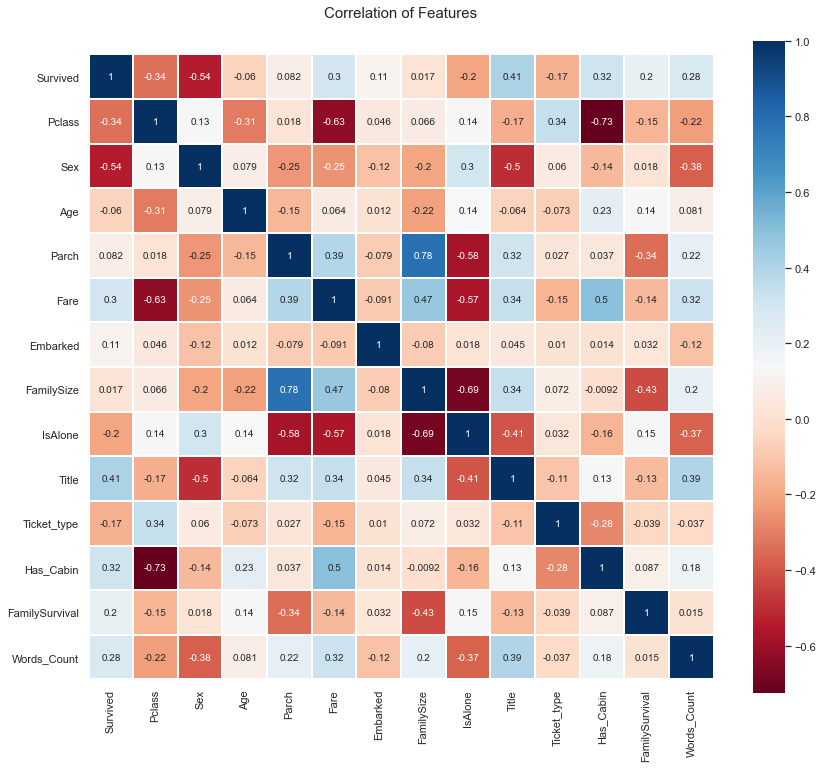

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [95]:
print(train.shape)
print(test.shape)
print(train.columns)
print(test.columns)

(891, 14)
(418, 13)
Index(['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked',
       'FamilySize', 'IsAlone', 'Title', 'Ticket_type', 'Has_Cabin',
       'FamilySurvival', 'Words_Count'],
      dtype='object')
Index(['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked', 'FamilySize',
       'IsAlone', 'Title', 'Ticket_type', 'Has_Cabin', 'FamilySurvival',
       'Words_Count'],
      dtype='object')


In [96]:
# keep only some columns
X_train = train[['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked',
       'FamilySize', 'IsAlone', 'Title', 'Ticket_type', 'Has_Cabin',
       'FamilySurvival']]
y_train = train['Survived']

In [97]:
print(X_train.shape)
print(y_train.shape)

(891, 12)
(891,)


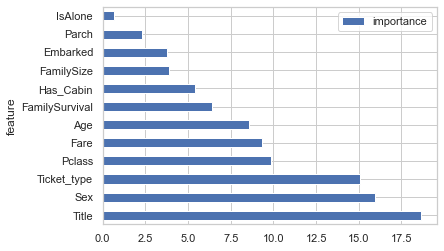

,feature,importance
0,Pclass,9.863134
1,Sex,15.967795
2,Age,8.550829
3,Parch,2.332784
4,Fare,9.337171
5,Embarked,3.771283
6,FamilySize,3.899297
7,IsAlone,0.670014
8,Title,18.672731
9,Ticket_type,15.082961


In [98]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=False)
model.fit(X_train, y_train)
importance = pd.DataFrame({'feature':X_train.columns, 'importance': model.feature_importances_})
importance.sort_values('importance', ascending=False).set_index('feature').plot(kind='barh')
plt.show()

importance

In [99]:
train.to_pickle('./train.pkl')
test.to_pickle('./test.pkl')
train = pd.read_pickle('./train.pkl')
test = pd.read_pickle('./test.pkl')

# Prediction #

In [100]:
from sklearn.model_selection import cross_val_score, cross_validate
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [101]:
y_train = train['Survived'].ravel()
features = ['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked',
       'FamilySize', 'Title', 'Ticket_type', 'Has_Cabin',
       'FamilySurvival']

x_train = train[features].values # Creates an array of the train data
x_test = test[features].values 

In [102]:
xgb = XGBClassifier()
cv_results = cross_validate(xgb, x_train, y_train, cv=5)
print(cv_results['test_score'].mean())
xgb.fit(x_train, y_train)
result = xgb.predict(x_test)

0.821568012051974


In [103]:
rf = RandomForestClassifier()
cv_results = cross_validate(rf, x_train, y_train, cv=5)
print(cv_results['test_score'].mean())
rf.fit(x_train, y_train)
result = rf.predict(x_test)

0.8181972255351202


In [104]:
#voting classifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn import svm, neighbors
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

ensemble = [CatBoostClassifier(verbose=False), RandomForestClassifier(), svm.NuSVC(probability=True), neighbors.KNeighborsClassifier()]

classifiers_with_names = []
_ = [classifiers_with_names.append((clf.__class__.__name__, clf)) for clf in ensemble]
voting = VotingClassifier(classifiers_with_names, voting='hard')

cv_results = cross_validate(voting, x_train, y_train, cv=5)
print(cv_results['test_score'].mean())

voting.fit(x_train, y_train)
result = voting.predict(x_test)

0.8417738999435065


**Gridsearch**

In [105]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# n_estimators = [100,  500, 800, 1200]
# max_depth = [5, 8, 15,30]
# min_samples_split = [2, 5, 10, 100]
# min_samples_leaf = [1, 2, 10] 
# forest = RandomForestClassifier(random_state = 1)

# hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
#               min_samples_split = min_samples_split, 
#              min_samples_leaf = min_samples_leaf)

# gridF = GridSearchCV(forest, hyperF )
# bestF = gridF.fit(x_train, y_train)
# print(bestF.best_estimator_)

**Kaggle best model (tuned)**

In [106]:
model = RandomForestClassifier(n_estimators=800, max_depth=15,min_samples_leaf=2, random_state=1).fit(x_train, y_train)
result = model.predict(x_test)

In [107]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": result
    })
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [108]:
submission.to_csv('./submission.csv', index=False)

## Other Models (Comparison) ##

In [117]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
cv_results_logreg = cross_validate(logreg, x_train, y_train, cv=10,scoring='accuracy')
print(cv_results_logreg['test_score'].mean())
logreg.fit(x_train, y_train)
logreg_predictions = logreg.predict(x_test)

0.8125593008739076


In [109]:
from sklearn.svm import  SVC,LinearSVC
model_svm=SVC()
cv_results_svm = cross_validate(model_svm, x_train, y_train, cv=10)
print(cv_results_svm['test_score'].mean())
model_svm.fit(x_train, y_train)
model_svm = model_svm.predict(x_test)

0.6655930087390761


In [118]:
from sklearn.ensemble import GradientBoostingClassifier

titanic_gbc = GradientBoostingClassifier(n_estimators = 100)
cv_results_gbc = cross_validate(titanic_gbc, x_train, y_train, cv=5)
print(cv_results_gbc['test_score'].mean())
titanic_gbc.fit(x_train, y_train)
titanic_predictions = titanic_gbc.predict(x_test)

0.8394890465130876


In [110]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 4)
cv_results_knn = cross_validate(model_knn, x_train, y_train, cv=5)
print(cv_results_knn['test_score'].mean())
model_knn.fit(x_train, y_train)
model_knn = model_knn.predict(x_test)

0.7755821982298663


In [111]:
from sklearn.naive_bayes import GaussianNB
model_gau= GaussianNB()
cv_results_gau = cross_validate(model_gau, x_train, y_train, cv=5)
print(cv_results_gau['test_score'].mean())
model_gau.fit(x_train, y_train)
model_gau = model_gau.predict(x_test)

0.7800828573222021


In [112]:
from sklearn.ensemble import AdaBoostClassifier
model_ada= AdaBoostClassifier()
cv_results_ada = cross_validate(model_ada, x_train, y_train, cv=5)
print(cv_results_ada['test_score'].mean())
model_ada.fit(x_train, y_train)
model_ada = model_ada.predict(x_test)

0.8237963718536185


In [113]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_linear= LinearDiscriminantAnalysis()
cv_results_linear = cross_validate(model_linear, x_train, y_train, cv=5)
print(cv_results_linear['test_score'].mean())
model_linear.fit(x_train, y_train)
model_linear = model_linear.predict(x_test)


0.8147824995292197


In [114]:
from sklearn.tree import DecisionTreeClassifier
model_dec= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
cv_results_dectree = cross_validate(model_dec, x_train, y_train, cv=5)
print(cv_results_dectree['test_score'].mean())
model_dec.fit(x_train, y_train)
model_dec = model_dec.predict(x_test)

0.8025359362249702


In [115]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model_qua=QuadraticDiscriminantAnalysis()
cv_results_qua = cross_validate(model_qua, x_train, y_train, cv=5)
print(cv_results_qua['test_score'].mean())
model_qua.fit(x_train, y_train)
model_qua = model_qua.predict(x_test)

0.7901701085933086


In [122]:
rf = RandomForestClassifier()
cv_results_rf = cross_validate(rf, x_train, y_train, cv=5)
print(cv_results_rf['test_score'].mean())
rf.fit(x_train, y_train)
result = rf.predict(x_test)

0.8249199673592367


In [124]:
xgb = XGBClassifier()
cv_results_xgb = cross_validate(xgb, x_train, y_train, cv=5)
print(cv_results_xgb['test_score'].mean())
xgb.fit(x_train, y_train)
result_xgb = xgb.predict(x_test)

0.821568012051974


In [125]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'AdaBoostClassifier', 
              'Gradient Decent', 'Linear Discriminant Analysis','Decision Tree','Quadratic Discriminant Analysis',
              'XGBoost'],
    'Score': [cv_results_svm['test_score'].mean(), cv_results_knn['test_score'].mean(), cv_results_logreg['test_score'].mean(), 
              cv_results_rf['test_score'].mean(), cv_results_gau['test_score'].mean(), cv_results_ada['test_score'].mean(), 
              cv_results_gbc['test_score'].mean(), cv_results_linear['test_score'].mean(),cv_results_dectree['test_score'].mean(),cv_results_qua['test_score'].mean(),
              cv_results_xgb['test_score'].mean()]})
models.sort_values(by='Score',ascending=False)

,Model,Score
6,Gradient Decent,0.839489
3,Random Forest,0.824920
5,AdaBoostClassifier,0.823796
10,XGBoost,0.821568
7,Linear Discriminant Analysis,0.814782
2,Logistic Regression,0.812559
8,Decision Tree,0.802536
9,Quadratic Discriminant Analysis,0.790170
4,Naive Bayes,0.780083
1,KNN,0.775582
